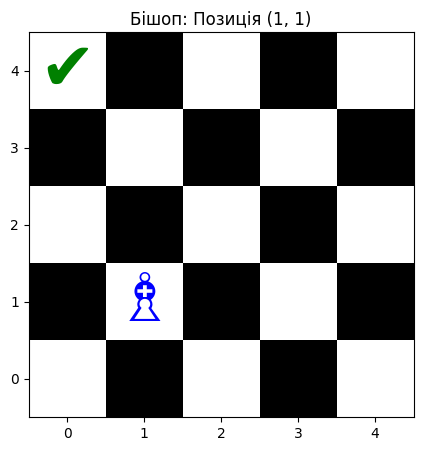

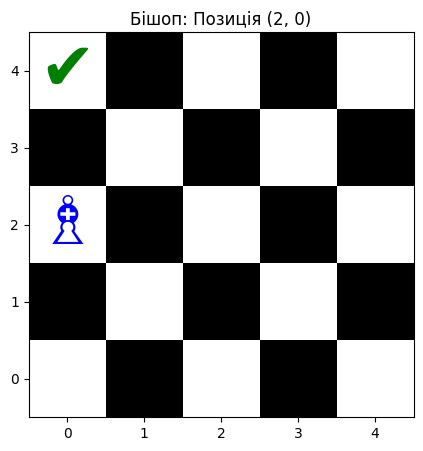

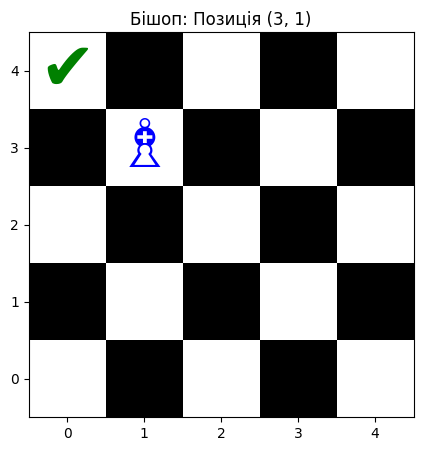

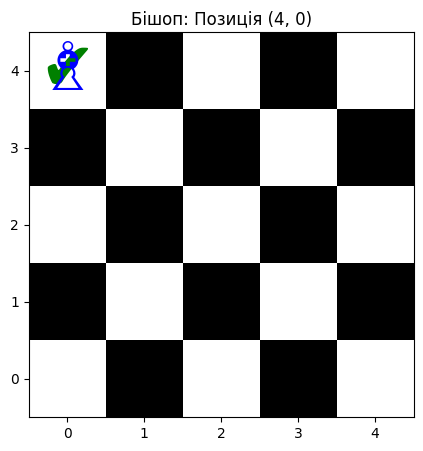

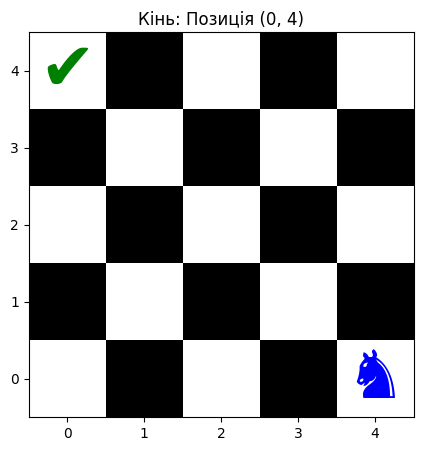

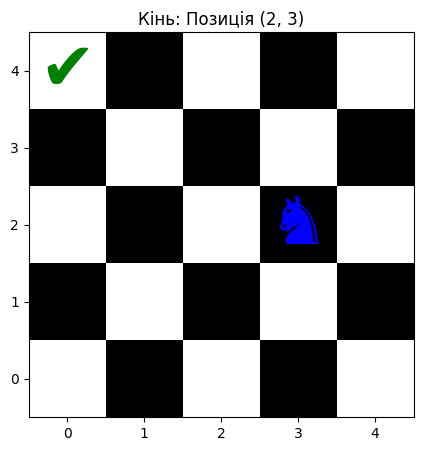

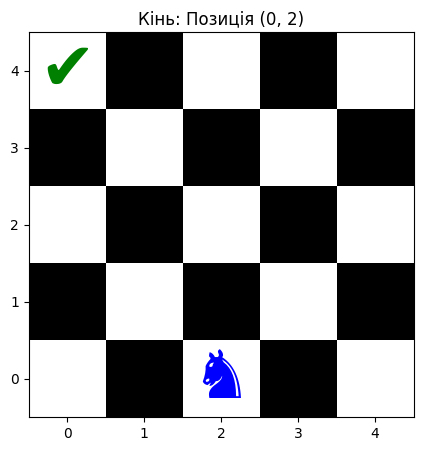

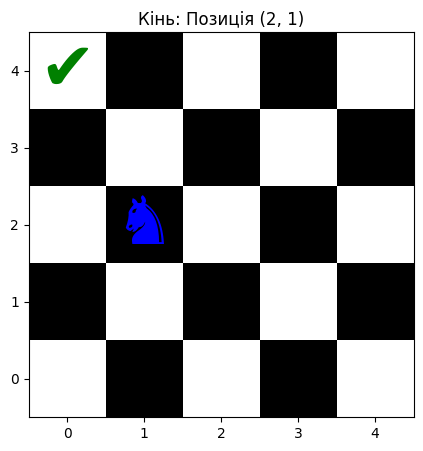

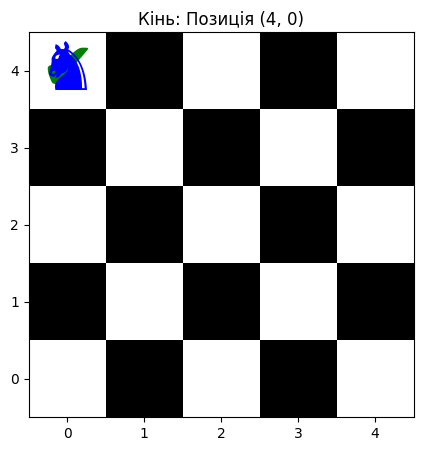

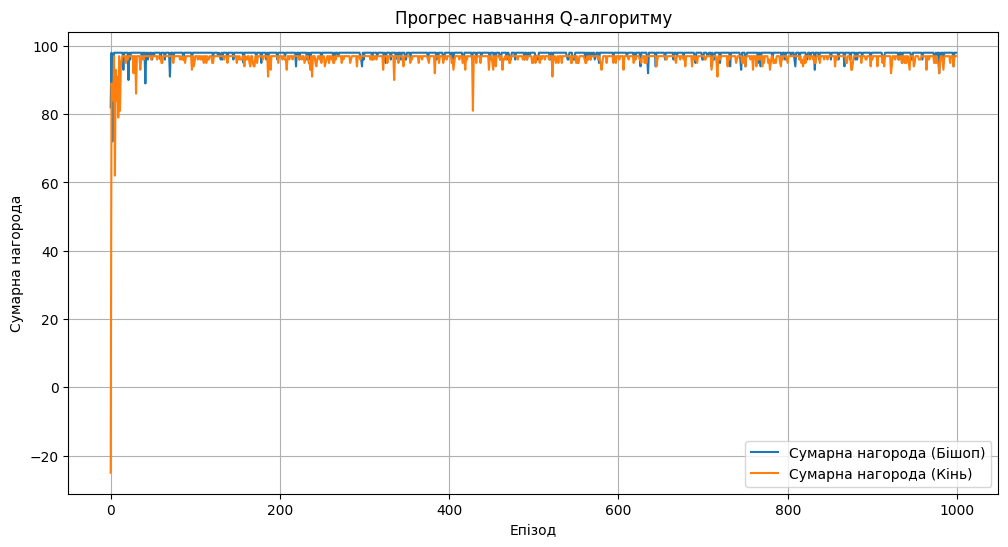

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

board_size = (5, 5)
goal_pos = (4, 0)
episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 0.1

bishop_actions = [(1, 1), (1, -1), (-1, 1), (-1, -1)]
bishop_start_pos = (1, 1)

knight_actions = [
    (2, 1), (2, -1), (-2, 1), (-2, -1),
    (1, 2), (1, -2), (-1, 2), (-1, -2)
]
knight_start_pos = (0, 4)

bishop_Q = np.zeros((*board_size, len(bishop_actions)))
knight_Q = np.zeros((*board_size, len(knight_actions)))

def choose_action(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(Q.shape[2]))
    else:
        return np.argmax(Q[state[0], state[1], :])

def take_action(state, action, actions):
    new_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if 0 <= new_state[0] < board_size[0] and 0 <= new_state[1] < board_size[1]:
        return new_state
    return state

def get_reward(state):
    if state == goal_pos:
        return 100
    return -1

def q_learning(start_pos, actions, Q):
    rewards_per_episode = []
    for episode in range(episodes):
        state = start_pos
        total_reward = 0
        while state != goal_pos:
            action = choose_action(state, Q, epsilon)
            new_state = take_action(state, action, actions)
            reward = get_reward(new_state)
            total_reward += reward
            best_next_action = np.max(Q[new_state[0], new_state[1], :])
            Q[state[0], state[1], action] += alpha * (reward + gamma * best_next_action - Q[state[0], state[1], action])
            state = new_state
        rewards_per_episode.append(total_reward)
    return Q, rewards_per_episode

def draw_board(agent_pos, name="Агент"):
    board = np.zeros(board_size)
    for i in range(board_size[0]):
        for j in range(board_size[1]):
            if (i + j) % 2 == 0:
                board[i, j] = 1
    plt.figure(figsize=(5, 5))
    plt.imshow(board, cmap="gray", origin="upper")
    plt.xticks(range(board_size[1]))
    plt.yticks(range(board_size[0]))
    plt.gca().invert_yaxis()
    plt.text(goal_pos[1], goal_pos[0], "✔", ha="center", va="center", fontsize=48, color="green", fontweight="bold")
    plt.text(agent_pos[1], agent_pos[0], "♗" if name == "Бішоп" else "♞", ha="center", va="center", fontsize=48, color="blue", fontweight="bold")
    plt.title(f"{name}: Позиція {agent_pos}")
    plt.show()

def visualize_path(Q, start_pos, actions, name="Агент"):
    state = start_pos
    path = [state]
    while state != goal_pos:
        action = np.argmax(Q[state[0], state[1], :])
        new_state = take_action(state, action, actions)
        if new_state == state:
            break
        path.append(new_state)
        state = new_state
    for step, pos in enumerate(path):
        draw_board(pos, name=name)
        time.sleep(0.5)

bishop_Q, bishop_rewards = q_learning(bishop_start_pos, bishop_actions, bishop_Q)
visualize_path(bishop_Q, bishop_start_pos, bishop_actions, name="Бішоп")

knight_Q, knight_rewards = q_learning(knight_start_pos, knight_actions, knight_Q)
visualize_path(knight_Q, knight_start_pos, knight_actions, name="Кінь")

plt.figure(figsize=(12, 6))
plt.plot(bishop_rewards, label="Сумарна нагорода (Бішоп)")
plt.plot(knight_rewards, label="Сумарна нагорода (Кінь)")
plt.xlabel("Епізод")
plt.ylabel("Сумарна нагорода")
plt.title("Прогрес навчання Q-алгоритму")
plt.legend()
plt.grid()
plt.show()
